
<img src='https://m.atcdn.co.uk/ect/media/%7Bresize%7D/6261c7bb2152499fb8c6006c9b8497c4.jpg' width='1000' height='300'>

**Auto Trader** is one of the largest companies in the UK for selling and buying cars. It is an automotive marketplace which allows sellers and buyers of cars to interact and connect. Users can search for their desired cars based on some specification namely **year of registration** , **car model**, **price**, etc. In this project we mainly focus on building a machine learning model to predict the price of the cars based on some relevent features. With regards to the dataset, we use a sample dataset which is composed of 11 unique features and 402005 observations. The process has been divided into several steps as stated below:

* **Part 1:** <i>Importing Data and Renaming Columns Names</i>
* **Part 2:** <i>Data/Domain Understanding
and Exploration</i>
 * ✔ <i>Meaning and Type of Features</i>
 * ✔ <i>Analysis of Distributions</i>
 * ✔ <i>Analysis of Associations, Data Exploration
and Visualisation</i>
* **part 3:** <i>Data Processing for Machine
Learning</i>
 * ✔ <i>Dealing with Missing Values, Outliers, and Noise</i>
 * ✔ <i>Feature Engineering</i>
   * Target Encoder
 * ✔ <i>Feature Selection</i>
   *  Correlation Coefficient and Analysis of Predictive Power of
Features
   *  Lasso Regression
   *  Mutual Information Regression
* **part 4:** <i>Model Building
   * ✔ Algorithm Selection, Model
Instantiation and Configuration, and Model Ranking and
Selection
* **part 5:** <i> Coarse-Grained Evaluation/Analysis </i>
* **part 6:** <i> Grid Search and Hyperparameter Tuning </i>
* **part 7:** <i> Model Evaluation and Analysis
   * ✔ Feature Importance and Fine-Grained Evaluation



### **importing all required libraries**






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%config InlineBackend.figure_format = 'svg'
plt.rcParams ['figure.figsize'] = (10,5)
sns.set(style='white', context='talk', font_scale=0.8)

!pip install --upgrade scikit-learn==1.3.2 -q

from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


## **Part 1:** <i>Importing Data and Renaming Columns name</i>
Importing the Auto Trader dataset plus two additional datasets which contain registration year for UK number plates for **Current System – 2001 to 2049** and **Prefix Type registration numbers – 1983 to 2001** from github which will be used for imputation in Data Preprocessing section <b><a href='https://www.autobulbsdirect.co.uk/blog/car-registration-years-chart/'>[Source]</a></b>

In [ ]:
#Importing the Auto_trader dataset
auto_trader_df = pd.read_csv("https://raw.githubusercontent.com/meera998/Auto_trader/main/Datasets/adverts.csv")

#Importing current system and prefix type registration number datasets
current_system = pd.read_csv("https://raw.githubusercontent.com/meera998/Auto_trader/main/Datasets/Registration_after_2001.csv")
prefix_type_registration = pd.read_csv("https://raw.githubusercontent.com/meera998/Auto_trader/main/Datasets/registraion_before_2001.csv")

#renaming the columns to easily understand the data
auto_trader_df = auto_trader_df.set_axis(
    ["pub_ref","mileage", "reg_code", "colour", "manufacturer","model","condition","reg_year","price","body_type","crossover","fuel_type"],
    axis="columns"
    )

## **Part 2:** <i>Data/Domain Understanding and Exploration</i>


### ✅ 2.1 Meaning and Type of Features
Initially, we have to understand our data and explore the observations of the dataset. This step is quite imperative as it gives us a general idea about the dataset's **size**, **structure** and **content** before starting data pre-processing and doing any analysis.


In [ ]:
# Display the first three observations to understand the structure and the content of our dataset
auto_trader_df.head(3)

pub_ref   mileage reg_code colour manufacturer model condition  \
0  202006039777689       0.0      NaN   Grey        Volvo  XC90       NEW   
1  202007020778260  108230.0       61   Blue       Jaguar    XF      USED   
2  202007020778474    7800.0       17   Grey        SKODA  Yeti      USED   

   reg_year  price body_type  crossover              fuel_type  
0       NaN  73970       SUV      False  Petrol Plug-in Hybrid  
1    2011.0   7000    Saloon      False                 Diesel  
2    2017.0  14000       SUV      False                 Petrol

In [ ]:
# Checking the shape of our dataset to get an initial understanding of its size and structure
print("The dataset is composed of {} rows and {} columns".format(auto_trader_df.shape[0], auto_trader_df.shape[1]))

The dataset is composed of 402005 rows and 12 columns


In [ ]:
# Now lets have a look at the statistical summary of the numerical columns
auto_trader_df.describe()

pub_ref        mileage       reg_year         price
count  4.020050e+05  401878.000000  368694.000000  4.020050e+05
mean   2.020071e+14   37743.595656    2015.006206  1.734197e+04
std    1.691662e+10   34831.724018       7.962667  4.643746e+04
min    2.013072e+14       0.000000     999.000000  1.200000e+02
25%    2.020090e+14   10481.000000    2013.000000  7.495000e+03
50%    2.020093e+14   28629.500000    2016.000000  1.260000e+04
75%    2.020102e+14   56875.750000    2018.000000  2.000000e+04
max    2.020110e+14  999999.000000    2020.000000  9.999999e+06

Taking clues from the descriptive statistics provided above, we can clearly see that there is a high variability in the mileage and price data. Additionally, the minimum and maximum value for mileage and price look suspicious which might indicate that we have <b>*outliers*</b> or <b>*`incorrect`*</b> data. we will cautiously inspect these issues in the subsequent sections.

In [ ]:
# Ultimately, we look at information about the columns and their data type
auto_trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pub_ref       402005 non-null  int64  
 1   mileage       401878 non-null  float64
 2   reg_code      370148 non-null  object 
 3   colour        396627 non-null  object 
 4   manufacturer  402005 non-null  object 
 5   model         402005 non-null  object 
 6   condition     402005 non-null  object 
 7   reg_year      368694 non-null  float64
 8   price         402005 non-null  int64  
 9   body_type     401168 non-null  object 
 10  crossover     402005 non-null  bool   
 11  fuel_type     401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


### ✅ 2.2 Analysis of Distribution
In this section we will be looking at the frequency distribution of the numerical features including `mileage`, `year of registration` and `price`. This will help us to identify outliers and visualize the spread of the values, alongside understanding median, quartiles and extreme values.

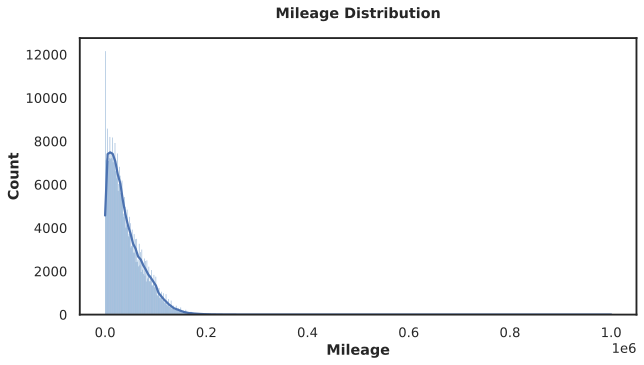

In [ ]:
# We plot histogram for mileage to observe the frequency distribution
sns.histplot(x=auto_trader_df[auto_trader_df["mileage"]>10]["mileage"], kde=True, edgecolor="skyblue", bins='auto');
plt.title("Mileage Distribution",pad=20, fontweight='bold');
plt.xlabel("Mileage", fontweight='bold'), plt.ylabel("Count", fontweight='bold');

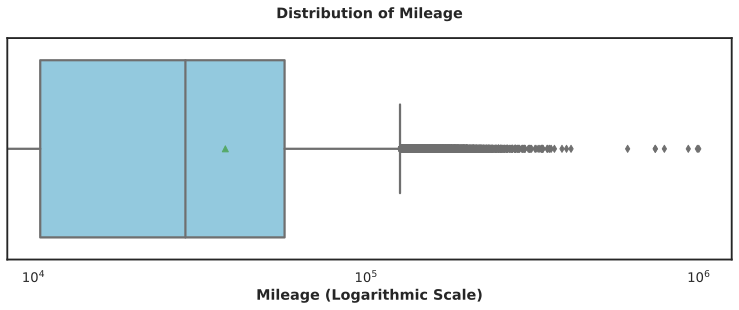

In [ ]:
# Next, we utilize boxplot to observe the spread of mileage, extreme values and quartiles
fig, ax = plt.subplots(figsize=(13,4))
sns.boxplot(x="mileage", data=auto_trader_df, color="skyblue", showmeans=True);
plt.title('Distribution of Mileage', pad=20, fontweight='bold');
plt.xlabel("Mileage (Logarithmic Scale)", fontweight='bold');
plt.xscale("log");

Based on these graphs above, we can clearly see that the values of mileage are widely spread and the distribution is positively skewed, because of that we used logarithmic scale for better visualization and easily revealing patterns. Generaly speaking, a car is expected to last for about 200,000 miles. However, if the car is well looked after, it might reach 300,000 miles. Furthermore, a well maintained and routinely serviced car may reach 500,000, but this is quite scarce.


```
```



Based on below box plot we can observe that there are many cars with price above **100,000£** which significantly impacted the overall distribution, this is considered as outlier and we will effectively deal with it in the pre-processing section. Overall, the distribution illustrates a diverse range of prices with the median of **12,600** and a notable spread between first and third quartiles.

In [ ]:
sns.boxplot(x=auto_trader_df["price"],color='#029386', showmeans=True);
plt.xscale('log');
plt.title('Distribution of Price', pad=20, fontweight='bold');
plt.xlabel("Price  (Logarithmic Scale)", fontweight='bold');

Below box plot is used to indicate the difference between **"NEW"** and **"USED"** car prices. we can clearly see that **"NEW"** cars show a higher median than **"USED"** cars which means the former tend to have higher prices. Additionally, the variance of **"USED"** cars is higher, as shown by longer whiskers and larger box. Ultimately, there are more extreme price values and ouliers in **"USED"** cars compared to "NEW" cars which might implies that there are classic or rare cars in the data.

In [ ]:
fig, ax = plt.subplots(figsize=(13,5));
sns.boxplot(x='price', y='condition',data=auto_trader_df, orient="h", showmeans=True);
plt.title('Distribution of Price Across Different Conditions', pad=20, fontweight='bold');
plt.xlabel("Price  (Logarithmic Scale)", fontweight='bold'), plt.ylabel("Condition", fontweight='bold');
plt.xscale("log");

### ✅ 2.3 Analysis of Associations, Data Exploration and Visualisation
In this section we aim to uncover relationships and differences between numeric and categorical values using some particular statistical techniques. This will help us to have a good understanding of the data and its charecteristics.

### ✔  Quantitative-Quantitative
To begin with, we will use **Perason Correlation Coefficient** to find out whether there are linear relationships between the numeric features and the target or not, and then use heatmap to visualize it.


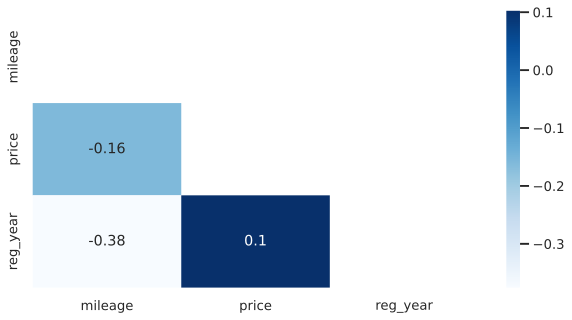

In [ ]:
# Using Perason Correlation Coefficient by calling corr() method
numeric_features = auto_trader_df[["mileage","price","reg_year"]].corr()

# Masking the data to show only the lower half and avoid duplicates
mask = np.triu(numeric_features)

# Visualize the correlation table using heatmap
sns.heatmap(numeric_features, annot=True,cmap="Blues", mask= mask);

To sum up :

- Apparentley there is a strong relationship between **`price`** and **`reg_year`**, which implies that the price typically tend to elevate when the car is newer.
- We can see there is also a moderate negative relationship between **`mileage`** and **`price`**. This means as the **`mileage`** becomes higher, the **`price`** tends to decrease slightly.
- There is also a strong negative correlation between **`mileage`** and **`reg_year`**, which means as the **`registration year`** become more recent, the **`mileage`**value becomes lower. In other words, older cars have higher **`mileage`**.




### ✔ 4.1 Quantitative-Categorical
* In section we will explore the correlation between categorical and numeric features and highlight some key differences and comparisons between different groups.
* We will try to identify how our target (**price**) varies across different categorical features such as **body_type**, **fuel_type**, **condition** etc.


Initially, I will use bar chart to visualize the correlation and distribution of price across different body_type for **"USED"** and **"NEW"** cars.

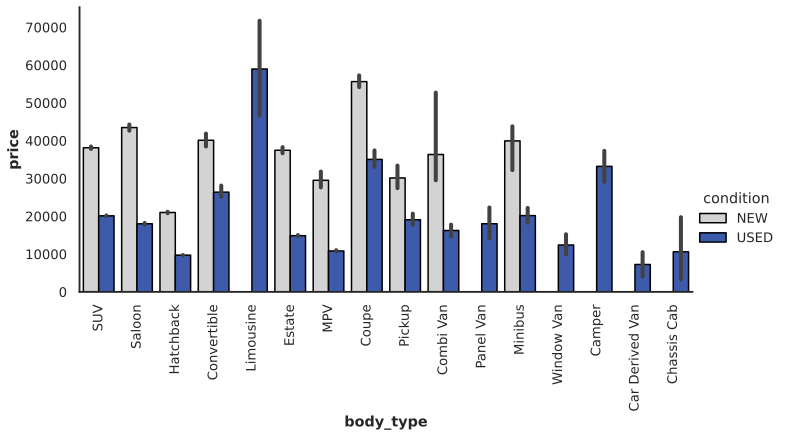

In [ ]:
sns.catplot(x="body_type", y="price", hue="condition", data =auto_trader_df,kind="bar", palette=["#d3d3d3","#2A52BE"], edgecolor="Black",aspect=2);
plt.xticks(rotation=90);
plt.xlabel("body_type", fontweight='bold'), plt.ylabel("price", fontweight='bold');

* Overall, the price of **"NEW"** cars are higher than **"USED"** cars.
* `Limousine`, `Convertivle`, `Coupe` and `Saloon` have higher prices compared to other body types.
* On the other hand, `Hatchback`, `MPV`, and `Window Van` exhibit lower prices.
* There is also a significant price variation between **"NEW"** and **"USED"** cars accross different body types.



```
```



Next, I will use box plot to visualize the correlation and distribution of price across different fuel_type for **"USED"** and **"NEW"** cars.

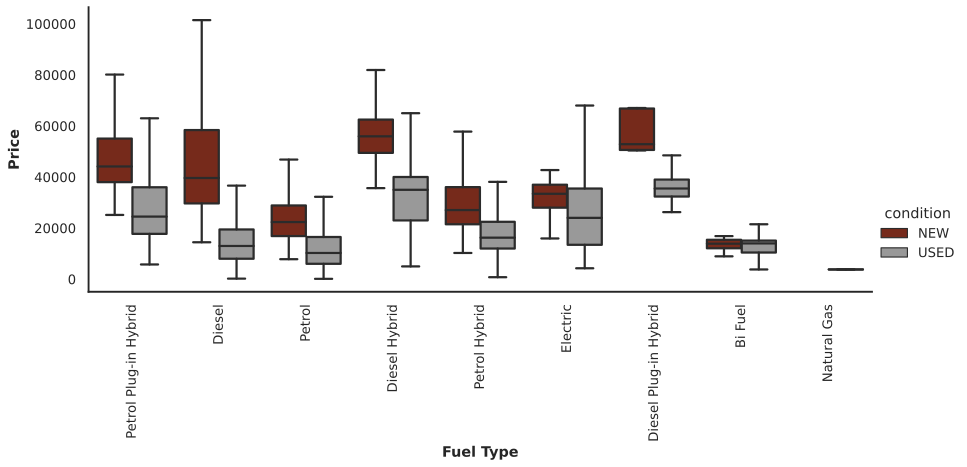

In [ ]:
bar_color = ["#85200c","#999999"]
sns.catplot(x='fuel_type',y='price', hue='condition', data=auto_trader_df, kind='box', aspect=2.5, palette=bar_color, showfliers=False);
plt.xlabel("Fuel Type", fontweight='bold'), plt.ylabel("Price", fontweight='bold')
plt.xticks(rotation=90);

All in all, the price of **"NEW"** cars are higher than **"USED"** cars. Additionally, while `Diesel`, `Diesel Plug-in Hybrid` and `Diesel Hybrid` have the highest price among the fuels types, Natural Gas has the lowest.

### ✔ 4.1 Categorical-Categorical
In this section we will be looking at associations between categorical features.

#### Now lets explore the distribution of **manufacturer** and color features with the `price` which is our target.
* Below I used **heatmap** to examine how price varies across different manufacturer by taking average price.

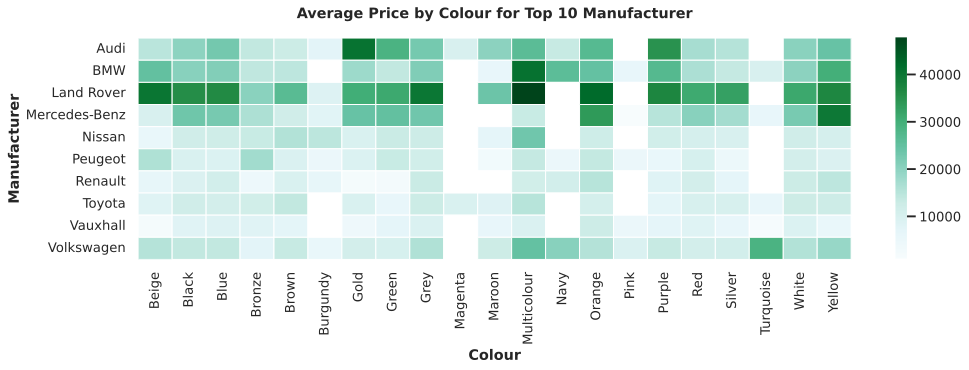

In [ ]:
fig, axs = plt.subplots(figsize=(16,4));

#Firstly, we subset our data by taking only top 10 manufacturers
top_10_manufacturer = auto_trader_df.groupby(["manufacturer"]).size().sort_values(ascending=False).head(10).index.tolist()

#After that we compare that list to our original dataset, so we can extract observations for only those 10 manufacturers
mask = auto_trader_df[(auto_trader_df["manufacturer"].isin(top_10_manufacturer))]

#Eventually, we create a pivot table to calculate average price for each combination of manufacturer and colour and use heatmap to visualize it
manufacturer_and_colour = mask[["manufacturer","colour","price"]].pivot_table(index='manufacturer', columns='colour', values="price", aggfunc='mean')

sns.heatmap(manufacturer_and_colour, linewidths=1, cmap="BuGn");
plt.title('Average Price by Colour for Top 10 Manufacturer', pad=20, fontweight='bold');
plt.xlabel("Colour", fontweight='bold'), plt.ylabel("Manufacturer", fontweight='bold');
plt.show();

***Conclusion:***
As we can obviously see that **Audi**, **BMW**, **Land Rover** and **Mercedes-Benz** with `Multicolour, Orange, Purple` and `yellow` have te heighest average price.

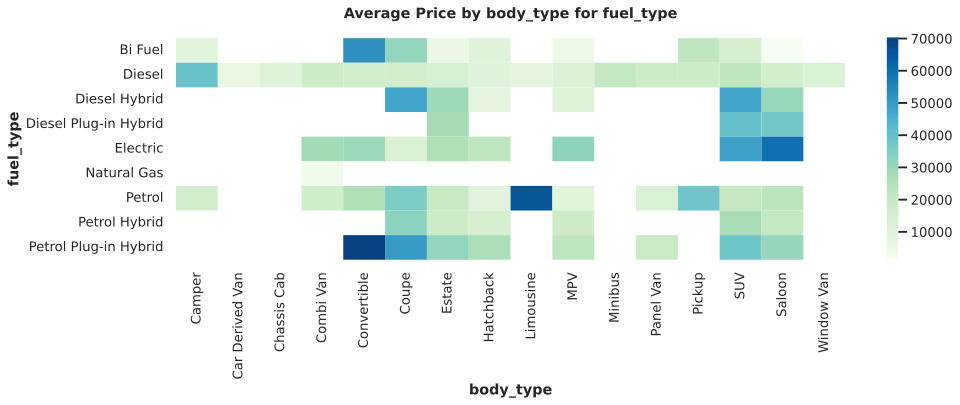

In [ ]:
fig, axs = plt.subplots(figsize=(15,4));

# Using groupby function to calculate average price by body_type and fuel_type
fuel_and_body = auto_trader_df[auto_trader_df["price"]<200000].groupby(['fuel_type', 'body_type'])["price"].mean().unstack()

# Using heatmap to visualize the price among different body_type and fuel_type
sns.heatmap(fuel_and_body, cmap="GnBu");
plt.title('Average Price by body_type for fuel_type', pad=20, fontweight='bold');
plt.xlabel("body_type", fontweight='bold'), plt.ylabel("fuel_type", fontweight='bold');
plt.show();

* Taking clues from the heatmap:
  * SUV and Saloon tend to have higher average prices across different **fuel types** compared to the rest of **body types**.
  * Natural Gas is only available for Combi Van.
  * Petrol Plug-in Hybrid and Electric show higher prices. Specifically, SUV and Saloon for Electric, Convertible and Coupe for Plug-in Hybrid.



```
```



## **Part 3:** <i>Data Processing for Machine Learning</i>


### ✅ 3.1 Data Cleaning (dealing with incorrect values, outliers)
In this section we will perform some approaches to clean and prepare our data. As we looked at our data previously we have missing values and outliers in the data. We will be dealing with these issues effectively.


*   First of all, lets explore the distribution of missing values through visualizations with the help of **Missingno** Python library.





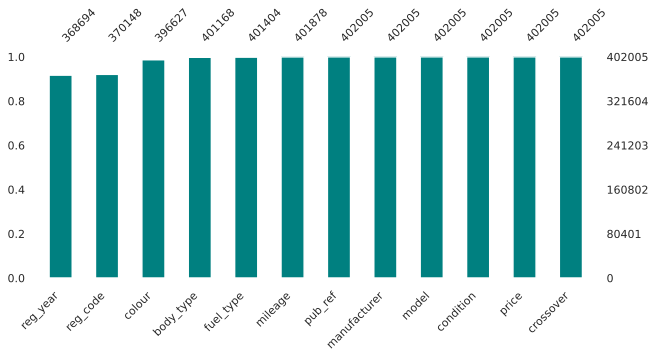

In [ ]:
# We use bar plot to visualize the missing values
msno.bar(auto_trader_df, figsize=(10,4), sort='ascending',fontsize=11, color='#008080');

 Taking clue from above graph, **`Registration year`**, **`Registration code`**, **`Colour`**, **`Body_type`**, **`Fuel_type`**, **`Mileage `** columns contain missing values. Furthermore, Registration year has a significant number of missing values compared to the rest.

Before going further and suggest some methods for filling the missing values, we will look at the correlation of missingness between the missing values columns by ploting **heatmap**.

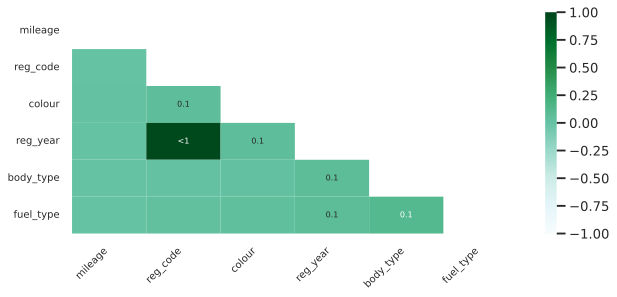

In [ ]:
msno.heatmap(auto_trader_df,fontsize=10, figsize=(10,4), cmap='BuGn');

Based our heatmap, it is observed that there is no systematic relationship between the columns in terms of missing values. However, since **reg_year** and **reg_code** represent similar aspect, we can see that their is a correlation between these two columns, based on that we will use **red_code** to fill the missing values in reg_year .

#### ✅ Filling missing values in Registration year


*   We start from registration year as it has the largest ratio compared to the other columns.
* As we mentioned before `Registration year` and `Registration code` represent same aspect so we can fill the missing values in `Registration year` with the help of `Registration code` column.
* In the **Importing dataset** section we mentioned that we will import two datasets which contain registration year for UK number plates for **Current System** – *2001 to 2049* and **Prefix Type registration** numbers – *1983 to 2001.*
* We will be using these two datasets to fill the missing values in `Registration year` by knowing the Registration code.




In [ ]:
# checking the unique values in reg_code column
auto_trader_df["reg_code"].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

Looking at the Values, we can see that we have improper capitalization, so, we will capitalize all the values.

In [ ]:
# Capitalize All the reg_code
auto_trader_df["reg_code"]= auto_trader_df["reg_code"].str.capitalize()

In [ ]:
# We will also drop some strange registration_code which will not affect our analysis since they are only three obseravtions
auto_trader_df[auto_trader_df["reg_code"].isin(["Ca","723xuu","Fw"])]

pub_ref  mileage reg_code     colour manufacturer     model  \
80899   202010014455127   2000.0       Ca      Green     Caterham     Seven   
156562  202009264242828  48000.0       Fw      Black       Morris        10   
166035  202010195172029   4050.0   723xuu  Turquoise    Chevrolet  Corvette   

       condition  reg_year  price    body_type  crossover fuel_type  
80899       USED       NaN  21995  Convertible      False    Petrol  
156562      USED    1934.0   5995       Saloon      False    Petrol  
166035      USED       NaN  89990          NaN      False    Petrol

In [ ]:
observations_to_drop = [202010014455127,202009264242828,202010195172029]
auto_trader_df = auto_trader_df[~auto_trader_df['pub_ref'].isin(observations_to_drop)]

We have an additional column in the **current_system** and **prefix_type_registration** that is useless for our work so we will drop it

In [ ]:
current_system.head(1)

Plate    Year  Registrarion year
0     51  Sep-01               2001

In [ ]:
# droping useless column
current_system = current_system.drop(columns="Year")
prefix_type_registration = prefix_type_registration.drop(columns="Year")

In [ ]:
# Renaming columns
current_system= current_system.rename(columns={"Plate":"reg_code","Registrarion year":'year'})
prefix_type_registration= prefix_type_registration.rename(columns={"Plate":"reg_code","Registrarion year":'year'})

After performing some basic transformation to the datasets, now we will take a copy of Auto trader dataset and applying a filter to extract the observations where the **reg_code** is not null but the **reg_year** is null.  

In [ ]:
# taking a copy of the dataset and applying the filter to get the desired result
reg_code_df = auto_trader_df.loc[
    ~(auto_trader_df['reg_code'].isnull()) & (auto_trader_df['reg_year'].isnull()),:
    ].copy()
reg_code_df.shape

(1739, 12)

Because we have both numbers and letters in the <b>reg_code</b> column we can not merge it with the pervious datasets unless we break it into two seperate datasets. As we can see below the data has been divided to letters and numbers.

In [ ]:
# Seperating letters and numbers into two different dataset
reg_code_letters = reg_code_df[pd.to_numeric(reg_code_df['reg_code'], errors='coerce').isnull()]
reg_code_numbers = reg_code_df[pd.to_numeric(reg_code_df['reg_code'], errors='coerce').notnull()]

# Then we need to convert the numbers to integer
reg_code_numbers.loc[:, "reg_code"] = reg_code_numbers["reg_code"].astype("int")

<ipython-input-28-2d6b1b2f8a5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_code_numbers.loc[:, "reg_code"] = reg_code_numbers["reg_code"].astype("int")
<ipython-input-28-2d6b1b2f8a5c>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reg_code_numbers.loc[:, "reg_code"] = reg_code_numbers["reg_code"].astype("int")


In [ ]:
reg_code_numbers.shape, reg_code_letters.shape, reg_code_numbers['reg_code'].dtype

((1691, 12), (48, 12), dtype('int64'))

Now our data is ready for merging with **current_system** and **prefix_type_registration** datasets

In [ ]:
merged_data_number = reg_code_numbers.merge(current_system,on="reg_code",how="left")
merged_data_letter = reg_code_letters.merge(prefix_type_registration, on="reg_code",how="left")

In [ ]:
# Checking whether the merge was successful or not
merged_data_number.head(1)

pub_ref  mileage  reg_code colour manufacturer     model condition  \
0  202007030806426  30000.0        18    Red     Vauxhall  Insignia      USED   

   reg_year  price  body_type  crossover fuel_type  year  
0       NaN  11990  Hatchback      False    Petrol  2018

As we can see our merge was successful, so now we combine these two datasets again by using **concat** method.

In [ ]:
reg_code_df = pd.concat([merged_data_letter,merged_data_number])
reg_code_df.shape

(1739, 13)

**Finally**, we will use this dataframe to fill the missing values in our original dataset, and then calculate how many observations we filled so far.

In [ ]:
missing_before = auto_trader_df["reg_year"].isnull().sum()

In [ ]:
auto_trader_df=auto_trader_df.set_index("pub_ref")
reg_code_df=reg_code_df.set_index("pub_ref")

# Filling the missing values
auto_trader_df["reg_year"].fillna(reg_code_df['year'], inplace=True)

# Checking whether our work was successful or not
auto_trader_df.query("pub_ref==202007030806426")[["reg_code",'reg_year']]

reg_code  reg_year
pub_ref                           
202007030806426       18    2018.0

In [ ]:
missing_after= auto_trader_df["reg_year"].isnull().sum()
print(f"{missing_before - missing_after} rows were filled successfully in Registraio year column! ")

1739 rows were filled successfully in Registraio year column! 


In [ ]:
# Checking missing values
pd.DataFrame(auto_trader_df.isnull().sum()).T.rename(index={0:"Missing Values"})

mileage  reg_code  colour  manufacturer  model  condition  \
Missing Values      127     31857    5378             0      0          0   

                reg_year  price  body_type  crossover  fuel_type  
Missing Values     31570      0        836          0        601

```
```

Therefore, we managed to fill `1739` observations in the **Registration year** by taking advantage of using **Registration code**. Due to this, we no longer need Registration code column and we will drop it. But before doing that let us check the observations where reg_code and reg_year are both missing.





In [ ]:
null_values = (auto_trader_df[(auto_trader_df["reg_code"].isnull()) & (auto_trader_df["reg_year"].isnull())])
null_values.shape

(31570, 11)

As we can see above, we have `31570` cars with no **Registration code** and **Registration year**. Before taking action on this issue, we will have a look at the conditions of these cars.

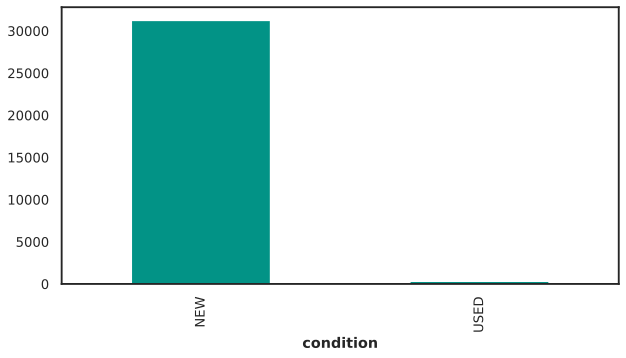

In [ ]:
null_values.groupby('condition')['condition'].count().plot(kind='bar', color="#029386");
plt.xlabel("condition", fontweight='bold');

With regards to the bar plot illustrating the occurance of **"NEW"** and **"USED"** condition, we conclude that **"NEW"** cars are usually not registered, therefore, they do not have registration code and year. It is logical to fill these missing values with the most recent year in the dataset.

In [ ]:
# Checking most recent year
auto_trader_df["reg_year"].max()

2045.0

It seems when we merged our datasets new **Registration years** have appeared, so let us replace all those years with the most recent year in the dataset before 2024.

In [ ]:
# Replacing all the incorrect years with the most recent year
auto_trader_df.loc[auto_trader_df['reg_year'] > 2024, 'reg_year'] = auto_trader_df.loc[auto_trader_df['reg_year'] < 2024, 'reg_year'].max()

In [ ]:
auto_trader_df['reg_year'].max()

2020.0

In [ ]:
# Now lets replace the null values in Registration year with most recent year
auto_trader_df["reg_year"].replace(np.nan,auto_trader_df["reg_year"].max(), inplace=True )

# And finally drop reg_code column
auto_trader_df.drop(columns="reg_code", inplace=True)

In [ ]:
# Checking missing values
pd.DataFrame(auto_trader_df.isnull().sum()).T.rename(index={0:"Missing Values"})

mileage  colour  manufacturer  model  condition  reg_year  \
Missing Values      127    5378             0      0          0         0   

                price  body_type  crossover  fuel_type  
Missing Values      0        836          0        601

#### ✅ Filling missing values in Mileage
* For mileage we will be using **Predictive Imputation**. By using this approach
we will build a model to predict the observed value of `mileage` based on other features.

* Initially, we will be looking at the correlations of the numeric features to select which feature is the best for the prediction.



```
```



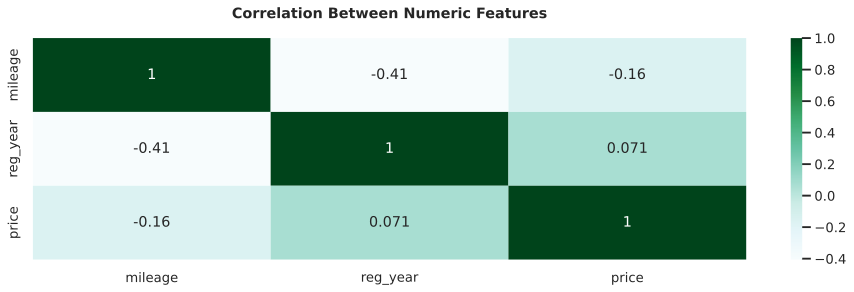

In [ ]:
# Using corr() method to define the correlaions between numeric features
correlation = auto_trader_df[["mileage","reg_year","price"]].corr()

fig, axs = plt.subplots(figsize=(16,4));

# Using heatmap to visualize the correlations
sns.heatmap(correlation, cmap='BuGn', annot=True);
plt.title('Correlation Between Numeric Features', pad=20, fontweight='bold');
plt.show();

* Taking clue from the heatmap, it appears that there is a strong negative correlation
between **mileage**, **reg_year** and **price**.
* We will not include price as a feature in the model since it is our target and it might lead to bias and overfitting.
* Although additional features could enhance the model's accuracy, but for now we will use only **reg_year** as for our case is valid.
* Before we start, we will be using **Z-SCORE**, which is a common statistical measure, to exclude the ouliers by defining a threshold of `(1.5)`. So, any data point that has **Z-SCORE** higher than `(1.5)` or less than `(-1.5)` will be excluded in the dataset.

In [ ]:
# Defining Z-SCORE for mileage feature
z_score = zscore(auto_trader_df[ 'mileage'])

# Define threshold for identifying outliers
threshold = 1.5

# Flag outliers based on the threshold
outliers = abs(z_score ) > threshold

In [ ]:
# First we exclude null values in our target which is mileage. Because our model will break if there are null values in the target
mileage_without_missing_values = auto_trader_df.dropna(subset=['mileage'])
mileage_with_missing_values = auto_trader_df[auto_trader_df["mileage"].isnull()]

# Excluding the outliers from the data
mileage_without_missing_values = mileage_without_missing_values[~outliers]

# After that, we will split our data into training features and target feature
X_train = mileage_without_missing_values[["reg_year"]]
y_train = mileage_without_missing_values[["mileage"]] #target

<ipython-input-46-3551663acbba>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mileage_without_missing_values = mileage_without_missing_values[~outliers]


In [ ]:
# Then we will build our model, and we use linear regression because our target is numeric
model = LinearRegression()

# Train our model by fitting X_train and y_train
model.fit(X_train, y_train)

# Predicting mileage
y_predict = model.predict(mileage_with_missing_values[['reg_year']])

# Filling the missing values with the predicted values
auto_trader_df.loc[auto_trader_df['mileage'].isnull(), 'mileage'] = y_predict

In [ ]:
# Checking missing values
pd.DataFrame(auto_trader_df.isnull().sum()).T.rename(index={0:"Missing Values"})

mileage  colour  manufacturer  model  condition  reg_year  \
Missing Values        0    5378             0      0          0         0   

                price  body_type  crossover  fuel_type  
Missing Values      0        836          0        601

So far we managed to fill the missing values in **Registration year** and **mileage**. Next, we will be dealing with **colour**, **body_type** and **fuel_type**, and we will use same approach for all of them.

```
```



#### ✅ Filling missing values in `Colour`, `Body_type` and `Fuel_type`

For filling the missing values in these categorical features, we will use the same approach which is imputing the missing values with the most frequent values. For this purpose we need to visualize it and then decide.
```
```



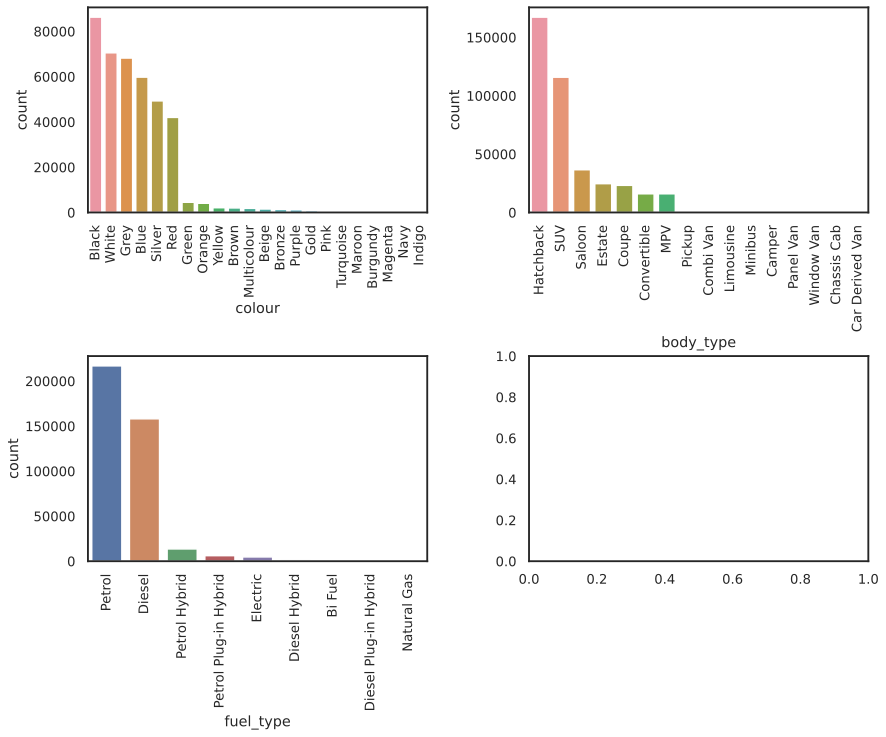

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(14,10));

sns.countplot(x=auto_trader_df["colour"], order=pd.Series(auto_trader_df["colour"]).value_counts().index, ax=axs[0][0]);
axs[0][0].tick_params(axis='x',rotation=90)

sns.countplot(x=auto_trader_df["body_type"], order=pd.Series(auto_trader_df["body_type"]).value_counts().index, ax=axs[0][1]);
axs[0][1].tick_params(axis='x',rotation=90)

sns.countplot(x=auto_trader_df["fuel_type"], order=pd.Series(auto_trader_df["fuel_type"]).value_counts().index, ax=axs[1][0]);
axs[1][0].tick_params(axis='x',rotation=90)

# Providing some space between graphs for more clarity
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.7)

From the graphs we can say that the most frequent values in Fuel_type, color and Body_type are the followings :

*   **colors**  ➡ `Black`, `White`, `Grey`, `Blue`, `Silver`, `Red`
*   **Body_types** ➡ `Hatchback`, `SUV`, `Saloon`, `Estate`, `Coupe`, `MPV`, `Convertible`
* **Fuel_type** ➡ `Petrol`, `Diesel`

Therefore, we will take a random sample of these values and fill them in the missing values randomly.








In [ ]:
most_frequent_colours = ["Black","White","Grey","Blue","Silver", "Red"]
most_frequent_body = ['Hatchback', 'SUV', 'Saloon', 'Estate', 'Coupe', 'Convertible','MPV']
most_frequent_fuel =["Petrol","Diesel"]

# Taking samples without replacement and randomly assigned them in the Nan fields, we will repeat the same technique for body and fuel type
color_sample = auto_trader_df[auto_trader_df["colour"].isin(most_frequent_colours)].sample(5378, replace=False).values[:,1]
auto_trader_df.loc[auto_trader_df['colour'].isnull(), 'colour'] = color_sample

body_sample = auto_trader_df[auto_trader_df["body_type"].isin(most_frequent_body)].sample(836, replace=False).values[:,7]
auto_trader_df.loc[auto_trader_df['body_type'].isnull(), 'body_type'] = body_sample

fuel_sample = auto_trader_df[auto_trader_df["fuel_type"].isin(most_frequent_fuel)].sample(601, replace=False).values[:,9]
auto_trader_df.loc[auto_trader_df['fuel_type'].isnull(), 'fuel_type'] = fuel_sample

In [ ]:
# Checking missing values
pd.DataFrame(auto_trader_df.isnull().sum()).T.rename(index={0:"Missing Values"})

mileage  colour  manufacturer  model  condition  reg_year  \
Missing Values        0       0             0      0          0         0   

                price  body_type  crossover  fuel_type  
Missing Values      0          0          0          0

#### ✅ Dealing with outliers
* Some of the features have extreme values which will imapct our model and result in bias. As we looked at the statistical information and distribution of numerical features, there were outliers in **mileage**, **reg_year** and **price**.



##### ✔ Lets deal with **Mileage** first.


As we observed from the previous graphs in the **Analysis of Distribution** section we have many cars which their mileages are above 200,000. Therefore, we replace all the mileages of those cars with mean of those cars that their mileages are under 200,000. <a href='https://www.buyacar.co.uk/car-advice/what-mileage-is-good-for-a-used-car/'><b>[source]</b></a>  

In [ ]:
auto_trader_df.loc[auto_trader_df["mileage"]>200000, "mileage"] = np.mean(auto_trader_df.loc[auto_trader_df["mileage"]<200000, "mileage"])

Now lets check if we have **"USED"** cars with zero mileage or not.

In [ ]:
used_and_zer_mileage = auto_trader_df.loc[(auto_trader_df["mileage"]==0) & (auto_trader_df["condition"]=='USED')].shape[0]
print("We have {} cars which is used and their mileages are zero.".format(used_and_zer_mileage))

We have 355 cars which is used and their mileages are zero.


As we can see we have 353 cars which have this issue. We will be using the **Predictive Imputation** again as we did before and use the same model to replace the mileage with the predicted value based their **Registration year**.

In [ ]:
# Creating mask to extract cars with zero mileage and used condition and predict their mileage based on their registration year
zero_mileage = auto_trader_df[(auto_trader_df["mileage"]==0) & (auto_trader_df["condition"]=='USED')]

# Predicting mileage
y_predict = model.predict(zero_mileage[["reg_year"]])

# Filling the missing values with the predicted values
auto_trader_df.loc[(auto_trader_df["mileage"]==0) & (auto_trader_df["condition"]=='USED') , "mileage"] = y_predict



```
```



##### ✔ Now lets deal with **reg_year** outliers.
* Firstly, we will look at the standard deviation and minimum value in reg_year.
* Based on these summary statistics we will decide how to overcome the ouliers by using **Z_SCORE** again.  





In [ ]:
standard_deviation = round(auto_trader_df['reg_year'].describe()[2])
minimum_value = auto_trader_df['reg_year'].describe()[3]

print(
    f"reg_year has standard deviation of {standard_deviation} and minimum value of {minimum_value}"
    )

reg_year has standard deviation of 8 and minimum value of 999.0


* Hence, looking at the minimum value we can say that there are some incorrect and extreme values in the **year of registration**. It could have happened because of data entry mistake.
* we will use **Z_SCORE** to extract the ouliers, and based on the standrad deviation which is 8, we will use threshold of `10` because it indicates a significant spread.

In [ ]:
# Defining Z-SCORE for reg_year feature
reg_year_zscore= zscore(auto_trader_df["reg_year"])

# Define threshold for identifying outliers
new_threshold = 10

# Flag outliers based on the threshold
reg_year_outliers = abs(reg_year_zscore) > new_threshold

auto_trader_df[reg_year_outliers]["reg_year"].values

array([1933., 1007., 1515., 1063., 1009., 1016., 1909., 1933., 1010.,
       1009., 1008., 1018.,  999., 1007.,  999., 1017.,  999., 1007.,
       1006., 1015.])

Since there are only 20 observations, we drop them as they will not have a great impact on our analysis.

In [ ]:
auto_trader_df = auto_trader_df[abs(reg_year_zscore) < new_threshold]



```
```



##### ✔ Now lets deal with **Price** outliers

Lets look at the minimum and maximum values of price.

In [ ]:
minimum_price = auto_trader_df['price'].describe()[3]
maximum_price = auto_trader_df['price'].describe()[7]
print(
    f"The minimum and maximum values for price are {minimum_price:,}£ and {maximum_price:,}£ respectively."
    )

The minimum and maximum values for price are 120.0£ and 9,999,999.0£ respectively.


* As we can see we have cars with price more than **1,000,000** which is really high.
* lets investigate further and find the reason of these high prices by grouping the prices by their manufacturer and model.

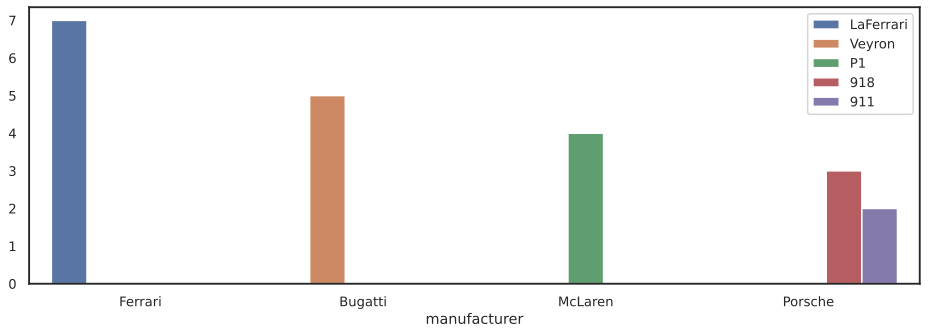

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

# Grouping based on manufacturer and model
manufacturer_prices = auto_trader_df[auto_trader_df["price"]>1000000].groupby(
    ["manufacturer","model"])["price"].size().sort_values(ascending= False).head(5)

# Ploting the occurance of the high priced car according to their manufacturers ad models
ax = sns.barplot(
    x=manufacturer_prices.index.get_level_values('manufacturer'),
    y=manufacturer_prices.values,
    hue= manufacturer_prices.index.get_level_values('model')
     );
# relocating the legends for more clarity
ax.legend(loc='upper right');

As we can see clearly most of the high priced cars belong to luxorious brands and models. Because we have only 10 observations of these luxorious brands, we will replace them with 1,000,000 as it is valid for this case and will not cause any harm.  

In [ ]:
auto_trader_df.loc[auto_trader_df["price"]>=1000000, "price"] = 1000000
#auto_trader_df=auto_trader_df[~((auto_trader_df["price"]<1000000) & (auto_trader_df["price"]>400000))]



```
```



#### ✅ 3.2 <i> Feature Engineering </i>
* Feature engineering is about creating new feature or transforming existing features from one representation to another which enhance our machine learning model.
* Since our target is numeric and we are using regression model for prediction, we have to transform categorical features in our dataset.
* Because we have high cardinality in our categorical features, we will use **Target Encoder** to avoid high dimensionality in our dataset which may lead to overfitting.
* A major issue emerges when applying **Target Encoder** which is `data leakage`.  Data leakage occurs when information outside of the training set is used to build the model, So the model can not generalize properly. To avoid this, we split our data into training and test set before applying Target Encoder.

In [ ]:
# Before applying Target Encoder we will transform the binary features
auto_trader_df["crossover"] = auto_trader_df["crossover"].map({False:0, True:1})
auto_trader_df["condition"] = auto_trader_df["condition"].map({"USED":0, "NEW":1})

In [ ]:
# Removing Public Reference as we will not need it
auto_trader_df.reset_index(drop=True, inplace=True)

# Extracting categorical features
categorical_features = auto_trader_df.select_dtypes("object").columns

In [ ]:
#auto_trader_df = auto_trader_df.sample(150000)

In [ ]:
# Then we split our data into train and test set
X, y = auto_trader_df.drop(columns="price"), auto_trader_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((301486, 9), (301486,), (100496, 9), (100496,))

In [ ]:
# Building our Target Encoder
auto_trader_encoder = TargetEncoder()

In [ ]:
# Fit the train set to the Target Encoder
X_train_encoder = auto_trader_encoder.fit(X_train, y_train)
X_train_transformed = auto_trader_encoder.transform(X_train)

X_test_transformed = auto_trader_encoder.transform(X_test)

In [ ]:
X_train_transformed.shape, X_test_transformed.shape

((301486, 9), (100496, 9))

In [ ]:
# We will apply the Target encoder on the entire dataset to do further explorations
transformed_auto_trader = auto_trader_encoder.fit_transform(X= auto_trader_df.drop(columns="price"), y=y)
transformed_auto_trader.head(2)

mileage        colour  manufacturer         model  condition  reg_year  \
0       0.0  19873.298808  24999.204914  40066.905105          1    2020.0   
1  108230.0  16814.084316  26422.624635  16111.920431          0    2011.0   

      body_type  crossover     fuel_type  
0  22506.524217          0  35225.323214  
1  19327.098322          0  16568.955095

#### ✅ 3.3 <i> Feature Selection </i>
* Feature selection is the process of choosing relevant features from your dataset and getting rid of noise in the data. This is conducted to enhance the machine learning model and improve its accuracy and diminish overfitting.



### ✔  Correlation Coefficient and Analysis of Predictive Power of Features
* Firstly, we will use `correlation coefficient` to uncover relationships between the features. <b><a href='https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b'>[Source]</a></b>.

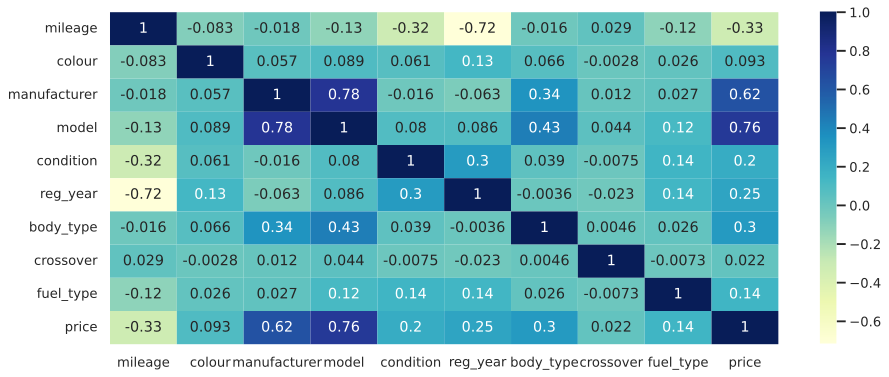

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

# Combining features and target
features_and_target = pd.concat([transformed_auto_trader, y], axis=1)
# Creating correlation coefficient matrix
feature_correlation = features_and_target.corr()

# visualizing it using heatmap
sns.heatmap(feature_correlation, cmap="YlGnBu", annot= True);

looking at the correlation coefficient matrix, the correlations I have identified are as follows:
* `Strong Correlations `
  * There is a strong positive relationship between **manufacturer** and **model**.
  * There is a strong positive relationship between **model** and **price**.
  * There is a strong positive relationship between **manufacturer** and **price**.
  * There is a strong negative correlation between **reg_year** and **mileage**.
* `Moderate Correlations`
  * there is a moderate correlation between **model** and **body_type**
  * there is a moderate correlation between **body_type** and **manufacturer**
  * there is also a moderate correlation between **condition** and **reg_year**
  * there is a moderate correlation between **mileage** and **price**
  * there is a moderate correlation between **body_type** and **price**
* `Weak correlations `
  * there is a weak correlation between **manufacturer** and **condition**
  * there is a weak correlation between **mileage** and **color**
  * there is a weak correlation between **crossover** and **price**
  * there is a weak correlation between **colour** and **price**


**`Conclusion`**: if two features are strongly correlated, they usually convey the same information for the machine learning model, and having both featuers might lower performance of the model. In this case, **manufacturer** and **model** represent the same information, similarly, **reg_year** and **mileage** also convey the same information. Furthermore, it seems that **mileage** and **manufacturer** significantly impact the target while **colour** and **crossover** show less importance.



```

```



### ✔  Lasso Regularization
**Lasso regression** is a powerfull regularization technique for selecting features. This method works by shrinking the coefficient to zero if the feature is irrelevant or highly collinear. Therefore, the features with coefficient are removed and the rest are taken <b><a href='https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b'>[Source]</a></b>.


In [ ]:
# First, we define our features and target separately
X = transformed_auto_trader[:]
y= auto_trader_df["price"]

# Then we build our lasso model and fit the features and traget to it
lasso_model = LassoCV()
lasso_model.fit(X, y)

# Then we combine the coefficient values with its columns
coef_values = pd.DataFrame(lasso_model.coef_, index = X.columns).T
coef_values

mileage    colour  manufacturer     model  condition  reg_year  body_type  \
0 -0.159741  0.050127      0.231891  0.933005        0.0       0.0  -0.041916   

   crossover  fuel_type  
0        0.0   0.263188

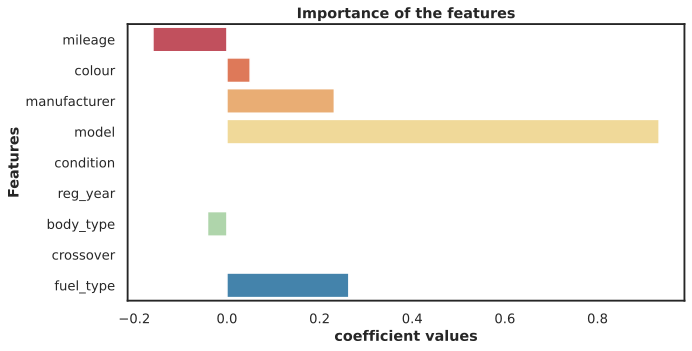

In [ ]:
coef_values = pd.Series(lasso_model.coef_, index = X.columns)

# Creating Bar plot to better visualize the importance of the features
sns.barplot(x=coef_values, y=coef_values.index, palette='Spectral')
plt.xlabel('coefficient values', fontweight='bold')
plt.ylabel('Features', fontweight= "bold")
plt.title('Importance of the features',fontweight= "bold");

Based on the bar chart, **model**, **fuel_type**, **manufacturer** and **mileage** are the most influential features affetcting the target. On the other hand, **colour**, **body_type**, **crossover**, **condition** and **reg_year** have insignificant influence on the target.   

### ✔  Mutual Information Regression
**MIR** is a statistical method used for feature selection. It measures the depedency between two features, higher value means higher dependency, and zero means the variables are independent.  <b><a href='https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a'>[Source]</a></b>.


In [ ]:
# We build our mutual information regression model and fit the features and traget to it
mutual_info_reg = mutual_info_regression(X, y)

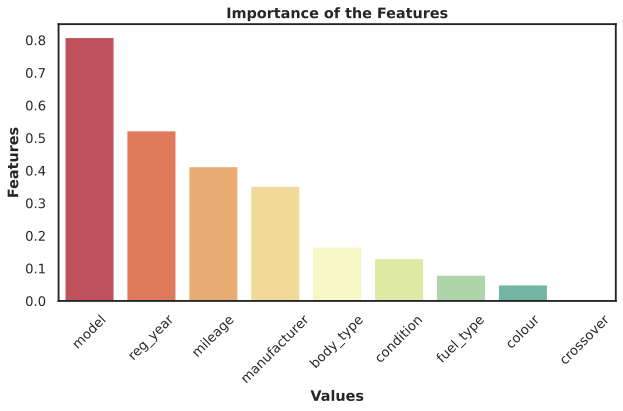

In [ ]:
# Then we combine the mutual info regression values with its columns
mutual_info_reg_values = pd.Series(mutual_info_reg, index = X.columns).sort_values(ascending=False)

# Creating Bar plot to better visualize the importance of the features
sns.barplot(x=mutual_info_reg_values.index, y=mutual_info_reg_values, palette='Spectral')
plt.xlabel('Values', fontweight='bold')
plt.ylabel('Features', fontweight= "bold")
plt.title('Importance of the Features', fontweight='bold');
plt.xticks(rotation=45);

* As we can see above, **model**, **reg_year**, **mileage**, **manufacturer**, **body_type** have the highest score among the features, while **condition**, **fuel_type**, **colour**, **crossover** have the lowest score and less influence on the target.


**`Conclusion: `**

* **Reg_year** and **mileage** are having a strong correlation and including both of them in the model might not be a good idea. Thus, based on the **Lasso Regression** test that we have done for feature importance, **reg_year** had zero value. Due to this, it might be better to drop this feature.
* **model** and **manufacturer** also illustrate a strong correlation, and both of them are the most influential features affecting the target. In this case, we will do some experimentation and assess how droping one of them impact the performance of our model.
  

##✅ **Part 4:**  <i>Model Building</i>


#### ✔ Algorithm Selection, Model Instantiation and Configuration, and Model Ranking and Selection
* In this section we will choose an appropriate model for our given problem. After choosing the model, we will create an instance of that model with its default parameters by importing the algorithm class from scikit-learn library.
* For model selection process we will be using `cross-validation` technique which is a powerful method for choosing the ideal algorithm and ranking them. <b><a href='https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial6.html'>[Source]</a></b>.
* By comparing the mean absolute error and standard deviation of the models we decide which model is best for our scenario incorporating:
   * **Linear Regression**
   * **Decision Tree Regressor**
   * **K-Nearest Neighbors**
   * **Random-Forest Regressor**
   * **Gradient Boosting**




In [ ]:
# First we split features and target
X_train = X_train_transformed
y_train = y_train

In [ ]:
# Next, we create a list of our desired models
machine_learning_models = [("Linear Regression", LinearRegression()),
            ("Knn", KNeighborsRegressor()),
            ("Decision Tree", DecisionTreeRegressor()),
            ("Random Forest", RandomForestRegressor()),
            ("GB", GradientBoostingRegressor()),
            ]

'''
After that, we use for loop tp apply cross validation on our models.
We choose Kfold of 2 to minimize the amount of time for excuting the process.
Lastly, we append all the models mean absolute erorr and standard deviation to a dictionary.
'''

models_and_scores = {}
for model_name, regressor in machine_learning_models:
  model_scores = cross_val_score(regressor, X_train, y_train, cv= 2, scoring='neg_mean_absolute_error')
  models_and_scores[model_name] = (model_scores.mean(), model_scores.std())

In [ ]:
# Here we sort the values of MAE scores
models_and_scores = dict(sorted(models_and_scores.items(), key=lambda item: item[1][0]))

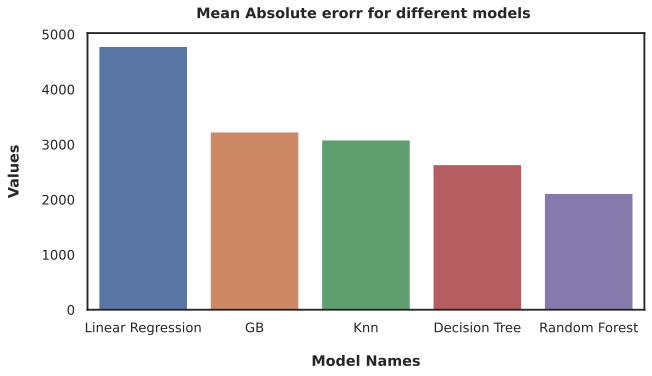

In [ ]:
# Then we read the scores inside the dictionary and then plot it with bar chart and compare the models
MAE = [abs(first_value[0]) for first_value  in models_and_scores.values() ]
algorithm_names = [models[0:] for models  in models_and_scores]

sns.barplot(x=algorithm_names, y= MAE);
plt.title("Mean Absolute erorr for different models ", fontweight="bold", pad=15);
plt.xlabel("Model Names", fontweight="bold", labelpad=20);
plt.ylabel("Values", fontweight="bold", labelpad=20);

* Looking at the bar chart, we can clearly see that **Random Forest Regressor** recored the lowest MAE. Lower MAE means that the performance of the model become better. Hence, **Random Forest** is the winner.
* Now lets look at the standard deviation of each model.

In [ ]:
# Again we sort the values of standrad deviation
models_and_standard_deviations = dict(sorted(models_and_scores.items(), key=lambda item: item[1][1], reverse=True))

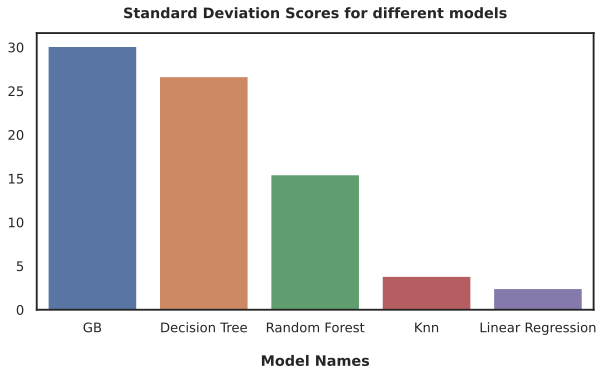

In [ ]:
# Then we read the scores inside the dictionary and then plot it with bar chart and compare the models
standard_deviation = [abs(second_value[1]) for second_value  in models_and_standard_deviations.values() ]
algorithm_names = [models[0:] for models  in models_and_standard_deviations]

sns.barplot(x=algorithm_names, y= standard_deviation);
plt.title("Standard Deviation Scores for different models", fontweight="bold", pad=15);
plt.xlabel("Model Names", fontweight="bold", labelpad=20);

* According to standard deviation, Linear Regression has the lowest score. However there is not a significant difference between Linear Regression and random forest.
* Standard deviation measures the variability in the model, Therefore lower standard deviation means less variability in the performance of the model.

**`Conclusion: `**: Based on these evidence, it seems that Random Forest Regressor performance is better than the other models. Thus, we will choose this algorithm for our scenario.

#### Model Instantiation and Configuration
* After choosing the appropriate model, we build our model by creating an object of that model which **Random Forest Regressor**.
* **Random Forest Regressor** is a powerful supervised machine learning algorithm that combines the predictions of multiple Decision Trees to enhance the accuracy of the model and reduce overfitting.
* After instantiating the model, we train it with the training set.

<img src='https://almablog-media.s3.ap-south-1.amazonaws.com/image_27_min_5744bcce6a.png' width='400' height='300'>




In [ ]:
# Buliding the model
Regressor = RandomForestRegressor()

In [ ]:
# Fitting the training set to the model
Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_train_predict = Regressor.predict(X_train)
y_test_predict = Regressor.predict(X_test_transformed)

##✅ **Part 5:**  <i>Coarse-Grained Evaluation/Analysis</i>
In this section we evaluate the performance of our model by using **Mean Absolute Erorr (MAE)** which gives us an overview of our model's performance.

In [ ]:
{"Train set prediction":mean_absolute_error(y_train,y_train_predict),"Test set prediction":mean_absolute_error(y_test,y_test_predict)}

{'Train set prediction': 853.9012830777867,
 'Test set prediction': 2114.0814544560158}

* Apparentely there is **overfitting**, because the model perform well on the training set but perform poor on the Test set. We will look into this problem later and try to solve it by finiding the best hyperparameters for the model by using **Grid Search**.
* Before doing that, lets do further evaluation by using **cross-validation** tehchnique.

In [ ]:
scores = cross_val_score(Regressor, X_train, y_train, cv= 5, scoring='neg_mean_absolute_error')

In [ ]:
pd.DataFrame(scores).T.rename(index={0:"KFolds"})

0            1            2            3            4
KFolds -2049.02301 -2048.989597 -2075.560692 -2063.543443 -2067.853399

We just applied 5 folds due to computational cost. Looking at the folds we can clearly see that there is a noticable variance between each iteration which might indicate inconsistency in the data. We will address this again in the Grid search part by selecting the best hyperparameters, also later by finding the most relavant features toward the target.
  

##✅ **Part 6:** Grid Search and Hyperparameter Tuning
* In this section we will perform Grid Search to find the best hyperparamters to improve the performance of the model.
* We use **Randomized Grid Search** instead of **Exhaustive Grid Search** because it is more efficient and more suitable for complex models.
* Due to computational cost we combine our features and target and take a sample of %10, and then split our data again into features and target.


In [ ]:
# Combining features with the target
train_set = pd.concat([X_train, pd.Series(y_train, name='price')], axis=1)

# Taking a sample from the data
sample_data = train_set.sample(frac=0.1, random_state=0)

# Spliting features and target
X_train_sample = sample_data.drop(columns='price')
y_train_sample = sample_data['price']

In [ ]:
# Here we define a search space with hyperparamters and their values
Parameters = {
    "n_estimators": list(np.arange(10,20, step=2)),
    "max_depth": list(np.arange(10,20,step=2)),
    "min_samples_leaf": randint(1,6),
    "min_samples_split": list(np.arange(2,12,step=2))
}

In [ ]:
# Building the randomized search by passing the Random Forest Regressor and the search space
Randomized_search = RandomizedSearchCV(Regressor, Parameters, cv=3)

In [ ]:
Randomized_search.fit(X_train_sample,y_train_sample)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 12, 14, 16, 18],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bade70908e0>,
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 12, 14, 16, 18]})

In [ ]:
# Then we pass the search metrics to pandas dataframe to show the performance of the model for each combination of hyperparameters
best_params = pd.DataFrame(Randomized_search.cv_results_)
best_params[['param_min_samples_split','param_min_samples_leaf','param_max_depth',
       'param_n_estimators', 'mean_test_score', 'std_test_score',
       'rank_test_score']].sort_values(by="rank_test_score").head(5)

param_min_samples_split param_min_samples_leaf param_max_depth  \
1                       6                      1              16   
9                       8                      1              18   
2                       2                      4              16   
7                       4                      5              12   
3                       8                      2              16   

  param_n_estimators  mean_test_score  std_test_score  rank_test_score  
1                 18         0.787021        0.034278                1  
9                 12         0.774122        0.020167                2  
2                 18         0.749655        0.039506                3  
7                 16         0.749083        0.016795                4  
3                 14         0.748141        0.013904                5

In [ ]:
Randomized_search.best_estimator_

RandomForestRegressor(max_depth=16, min_samples_split=6, n_estimators=18)

In [ ]:
# Building our model again with the best hyperparameters
Regressor = RandomForestRegressor(max_depth=14, min_samples_split=8, n_estimators=18, min_samples_leaf=1)
Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, min_samples_split=8, n_estimators=18)

In [ ]:
y_train_predict = Regressor.predict(X_train)
y_test_predict = Regressor.predict(X_test_transformed)

In [ ]:
{"Train set prediction":mean_absolute_error(y_train,y_train_predict),"Test set prediction":mean_absolute_error(y_test,y_test_predict)}

{'Train set prediction': 1917.8352746998387,
 'Test set prediction': 2218.512184294852}

* After applying **Randomized Search** and finiding the best hyperparameters, we managed to reduce overfitting significantly. However, still we have some degree of **overfitting** but it is not overly concerning.
* Although, the **mean absolute error** value of the model is still high, I will aim to reduce it by focusing on the most influncial features later on.

##✅ **Part 7 :** <i>Model Evaluation and Analysis</i>


#### ✔ Feature Importance and Fine-Grained Evaluation
Although we did this step in Feature Selection part previously, we will do it again and choose only the most influencial features that impact the target and evaluatue our model again. We use Random Forest to determine the importance of the features.


In [ ]:
X = X_train_sample
y= y_train_sample
# Instantiate the model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X, y)

# Access feature importances
importances = Regressor.feature_importances_

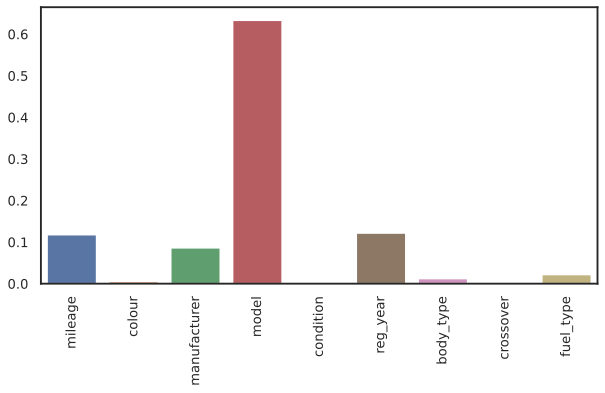

In [ ]:
sns.barplot(x=X.columns,y=importances)
plt.xticks(rotation=90);

In [ ]:
Regressor.fit(X_train.drop(columns=["condition","crossover","fuel_type"]), y_train)

RandomForestRegressor(max_depth=14, min_samples_split=8, n_estimators=18)

In [ ]:
y_train_predict = Regressor.predict(X_train.drop(columns=["condition","crossover","fuel_type"]))
y_test_predict = Regressor.predict(X_test_transformed.drop(columns=["condition","crossover","fuel_type"]))

In [ ]:
{"Train set prediction":mean_absolute_error(y_train,y_train_predict),"Test set prediction":mean_absolute_error(y_test,y_test_predict)}

{'Train set prediction': 2020.777816041395,
 'Test set prediction': 2339.1096809498517}

- As we can see droping the unimportant features has not enhanced the performance of the model.
- Also we dropped **reg_year** and **manufacturer** features as we mentioned previously in **Feature Selection** part because they were highly correlated with **mileage** and **model** respectively. But it downgrade the model's performance rather than improving it.

#### ✅ Now lets do some Fine-Grained evaluation
we will extract one observation from the test set and try to predict its price value and compare it to the original price.  

In [ ]:
# Combining the test set and target
pd.DataFrame(pd.concat([X_test_transformed.iloc[8518],y_test[y_test.index == 8518]], axis=0)).T

mileage        colour  manufacturer        model  condition  reg_year  \
0  144000.0  13619.227275   21559.97665  4444.884178        0.0    2007.0   

      body_type  crossover     fuel_type     8518  
0  26266.622903        0.0  16338.435918  16995.0

In [ ]:
# Predicting the price for the above observation
predicted_price = Regressor.predict(
    X_test_transformed[X_test_transformed.index == 8518].drop(columns=["condition","crossover","fuel_type"])
    )[0]
print(
    "The actual price value is £{:,} while the predicted price value is £{:,}, therefore the difference is only £{}"
    .format(y_test.loc[y_test.index == 8518].values[0],round(predicted_price),(y_test.loc[y_test.index == 8518].values[0]-round(predicted_price)))
    )

The actual price value is £16,995 while the predicted price value is £16,715, therefore the difference is only £280


**Overall**, our model perform good. The difference between the actual price and the predicted price is relatively small, especially in the context of estimating price of cars.  

* Now, lets do another experiment. In the dataset, I noticed that there are some cars with the same specifications but different **registration year**.
* For instace, below I extracted two Ferrari cars with the same **model**, **condition**, **body_type**, **crossover** and **fuel_type**. However, looking at their price we can notice that Ferrari with registration year of 2007 is more expensive than Ferrari with registration year of 2017.
* Specific models of cars have higher demand due to some factors like rare model, special edition or unique styilng.

In [ ]:
# Subseting the required observations
auto_trader_df[(auto_trader_df.index == 83095)|(auto_trader_df.index == 86992)]

mileage colour manufacturer model  condition  reg_year  price  \
83095  16000.0   Grey      Ferrari  F430          0    2007.0  84995   
86992  22200.0  White      Ferrari  F430          0    2017.0  82495   

         body_type  crossover fuel_type  
83095  Convertible          0    Petrol  
86992  Convertible          0    Petrol

In [ ]:
# Predicting the price value for both cars
ferrari_2007 = Regressor.predict(X_train[X_train.index == 83095].drop(columns=["condition","crossover","fuel_type"]))
ferrari_2017 = Regressor.predict(X_train[X_train.index == 86992].drop(columns=["condition","crossover","fuel_type"]))
predicted_values = {'values':[round(ferrari_2007[0]),round(ferrari_2017[0])]}

In [ ]:
# Then we combine the original prices with the predicted prices into one dataframe
pd.concat(
    [auto_trader_df[(auto_trader_df.index == 83095)|(auto_trader_df.index == 86992)][["reg_year","price"]].rename(columns={'price':'actual price'}),
     pd.DataFrame({"predicted price":predicted_values["values"][0:2]}).rename(index={0:83095,1:86992})],
     axis=1)

reg_year  actual price  predicted price
83095    2007.0         84995            86212
86992    2017.0         82495            99684

* As we can see, while there is a slight difference between the actual and predicted price for the first observation, there is a significant difference between the actual and predicted price for the second one. The model can not understand these unique cases, so, it assumes that newer cars should be more expensive than older cars.
* Further analysis and domain experstise might mitigate this problem but for now it is valid for our project.  